In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

In [2]:
df_raw = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df_raw.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df_raw.shape

(7043, 21)

In [4]:
df_raw.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df_raw.isnull().any()

,0
customerID,False
gender,False
SeniorCitizen,False
Partner,False
Dependents,False
tenure,False
PhoneService,False
MultipleLines,False
InternetService,False
OnlineSecurity,False


In [6]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df_cal = df_raw.copy()
df_cal.rename(columns={'gender':'Gender'
                       ,'customerID':'CustomerID'
                       ,'Contract':'ContractType'
                       ,'InternetService':'InternetServiceType'
                       ,'tenure':'Tenure'
                      }
              ,inplace=True)

df_cal['Partner'] = df_cal.Partner.map({'Yes':1,'No':0})
df_cal['Dependents'] = df_cal.Dependents.map({'Yes':1,'No':0})
df_cal['PhoneService'] = df_cal.PhoneService.map({'Yes':1,'No':0})
df_cal['MultipleLines'] = df_cal.MultipleLines.map({'Yes':1,'No':0,'No phone service':0})

df_cal['InternetService'] = df_cal.InternetServiceType.map({'DSL':1,'Fiber optic':1,'No':0})
df_cal['OnlineSecurity'] = df_cal.OnlineSecurity.map({'Yes':1,'No':0,'No internet service':0})
df_cal['OnlineBackup'] = df_cal.OnlineBackup.map({'Yes':1,'No':0,'No internet service':0})
df_cal['DeviceProtection'] = df_cal.DeviceProtection.map({'Yes':1,'No':0,'No internet service':0})
df_cal['TechSupport'] = df_cal.TechSupport.map({'Yes':1,'No':0,'No internet service':0})
df_cal['StreamingTV'] = df_cal.StreamingTV.map({'Yes':1,'No':0,'No internet service':0})
df_cal['StreamingMovies'] = df_cal.StreamingMovies.map({'Yes':1,'No':0,'No internet service':0})
df_cal['IsContracted'] = df_cal.ContractType.map({'One year':1,'Two year':1,'Month-to-month':0})
df_cal['PaperlessBilling'] = df_cal.PaperlessBilling.map({'Yes':1,'No':0})
df_cal['Churn'] = df_cal.Churn.map({'Yes':1,'No':0})

df_cal.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetServiceType,OnlineSecurity,...,StreamingTV,StreamingMovies,ContractType,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService,IsContracted
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,...,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,1,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,0,0,One year,0,Mailed check,56.95,1889.5,0,1,1
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,1,0
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,...,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,1
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,1,0


In [8]:
df_cal.dtypes

,0
CustomerID,object
Gender,object
SeniorCitizen,int64
Partner,int64
Dependents,int64
Tenure,int64
PhoneService,int64
MultipleLines,int64
InternetServiceType,object
OnlineSecurity,int64


In [58]:
def Data_transformation_renaming(df_raw):
    """ Rename column names and transformed into proper format and return dataframe """
    df_cal = df_raw.copy()

    df_cal.rename(columns={'gender':'Gender'
                       ,'customerID':'CustomerID'
                       ,'Contract':'ContractType'
                       ,'InternetService':'InternetServiceType'
                       ,'tenure':'Tenure'
                      }
              ,inplace=True)


    df_cal['Partner'] = df_cal.Partner.map({'Yes':1,'No':0})
    df_cal['Dependents'] = df_cal.Dependents.map({'Yes':1,'No':0})

    df_cal['PhoneService'] = df_cal.PhoneService.map({'Yes':1,'No':0})
    df_cal['MultipleLines'] = df_cal.MultipleLines.map({'Yes':1,'No':0,'No phone service':0})

    df_cal['InternetService'] = df_cal.InternetServiceType.map({'DSL':1,'Fiber optic':1,'No':0})
    df_cal['OnlineSecurity'] = df_cal.OnlineSecurity.map({'Yes':1,'No':0,'No internet service':0})
    df_cal['OnlineBackup'] = df_cal.OnlineBackup.map({'Yes':1,'No':0,'No internet service':0})
    df_cal['DeviceProtection'] = df_cal.DeviceProtection.map({'Yes':1,'No':0,'No internet service':0})
    df_cal['TechSupport'] = df_cal.TechSupport.map({'Yes':1,'No':0,'No internet service':0})
    df_cal['StreamingTV'] = df_cal.StreamingTV.map({'Yes':1,'No':0,'No internet service':0})
    df_cal['StreamingMovies'] = df_cal.StreamingMovies.map({'Yes':1,'No':0,'No internet service':0})
    df_cal['PaperlessBilling'] = df_cal.PaperlessBilling.map({'Yes':1,'No':0})
    df_cal['Churn'] = df_cal.Churn.map({'Yes':1,'No':0})

    # Data mining
    df_cal['IsContracted'] = df_cal.ContractType.map({'One year':1,'Two year':1,'Month-to-month':0})

    # Data transformation

    # Converting TotalCharges into Numeric, but some of the records are empty, so first we need to deal with them.
    df_cal.loc[df_cal['TotalCharges']==' ','TotalCharges'] = np.nan

    # First we convert TotalCharges to float and then replace with tenure * monthly charges
    df_cal['TotalCharges'] = df_cal['TotalCharges'].astype('float64')
    df_cal.loc[df_cal['TotalCharges'].isnull()==True,'TotalCharges'] = df_cal['MonthlyCharges'] * df_cal['Tenure']


    return df_cal

In [59]:
df_cal = Data_transformation_renaming(df_raw)

df_cal.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetServiceType,OnlineSecurity,...,StreamingTV,StreamingMovies,ContractType,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService,IsContracted
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,...,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,1,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,0,0,One year,0,Mailed check,56.95,1889.50,0,1,1
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,1,0
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,...,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,1
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,1,0


In [60]:
cat_cols = ["Gender","Partner","Dependents","SeniorCitizen","PhoneService","MultipleLines"
                    ,"InternetServiceType","OnlineSecurity","OnlineBackup","DeviceProtection"
                    ,"TechSupport","StreamingTV","StreamingMovies","IsContracted"
                    ,"ContractType","PaperlessBilling","PaymentMethod"]


num_cols = ["Tenure","MonthlyCharges","TotalCharges"]

target_col = 'Churn'

# spliting categorical columns into Nominal and Binary columns

nominal_cols = ['Gender','InternetServiceType','PaymentMethod','ContractType']

binary_cols = ['SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity'
               ,'OnlineBackup' ,'DeviceProtection','TechSupport','StreamingTV', 'StreamingMovies'
               ,'PaperlessBilling','InternetService', 'IsContracted']

In [61]:
df_cal[cat_cols].describe(include='all')

,Gender,Partner,Dependents,SeniorCitizen,PhoneService,MultipleLines,InternetServiceType,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,IsContracted,ContractType,PaperlessBilling,PaymentMethod
count,7043,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043,7043.000000,7043
unique,2,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,4
top,Male,NaN,NaN,NaN,NaN,NaN,Fiber optic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Month-to-month,NaN,Electronic check
freq,3555,NaN,NaN,NaN,NaN,NaN,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3875,NaN,2365
mean,NaN,0.483033,0.299588,0.162147,0.903166,0.421837,NaN,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.449808,NaN,0.592219,NaN
std,NaN,0.499748,0.458110,0.368612,0.295752,0.493888,NaN,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.497510,NaN,0.491457,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN
25%,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN
50%,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,NaN
75%,NaN,1.000000,1.000000,0.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,NaN


In [62]:
df_cal[num_cols].describe()

,Tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [63]:
def Outlier_boxplot(df, col):
    """ Display boxplot for given column """
    sns.boxplot(x=df[col])
    plt.show()

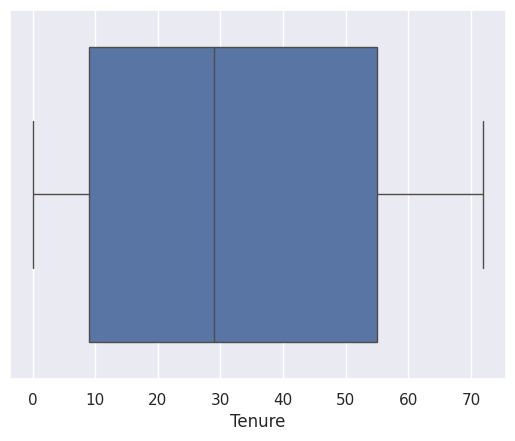

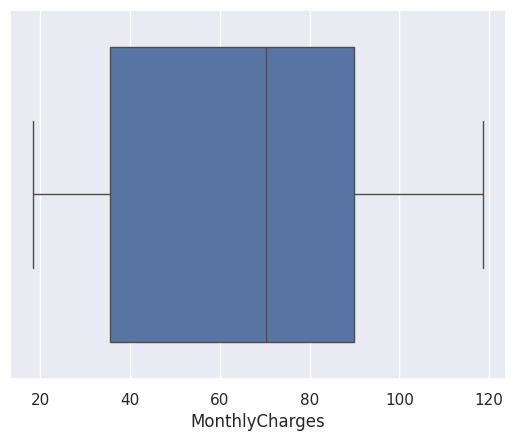

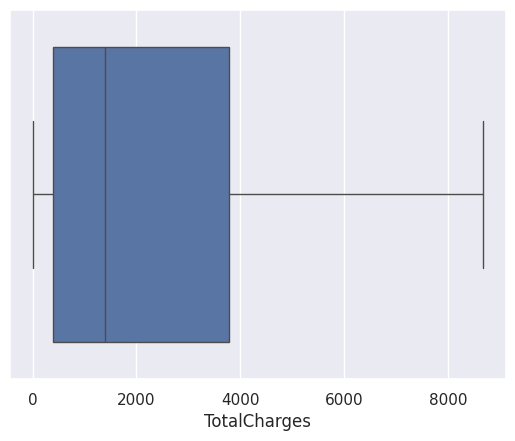

In [64]:
for i in num_cols:
    Outlier_boxplot(df_cal,i)

In [71]:
import matplotlib.pyplot as plt

def Generate_bar_graph(x, y, x_title, y_title, chart_title, color='blue'):
    """ Based on x and y value, generate bar graph """

    fig, ax = plt.subplots()
    ax.bar(range(len(x)), y, width=0.75, color=color, alpha=0.6)

    # Stopping alphabetical sorting of graph
    plt.xticks(range(len(x)), x)
    plt.title(chart_title, fontsize=14)
    plt.xlabel(x_title, fontsize=13)
    plt.ylabel(y_title, fontsize=13)
    plt.grid(False)  # Make sure this is set correctly
    plt.yticks(fontsize=0)
    plt.ylim(top=1)

    # Visible x-axis line
    for spine in plt.gca().spines.values():
        spine.set_visible(False) if spine.spine_type != 'bottom' else spine.set_visible(True)

    # Display label for each plot
    for i, v in enumerate(y):
        ax.text(i, v + 0.05, str(round((v * 100), 2)) + '%', fontsize=13, ha='center')

    plt.show()


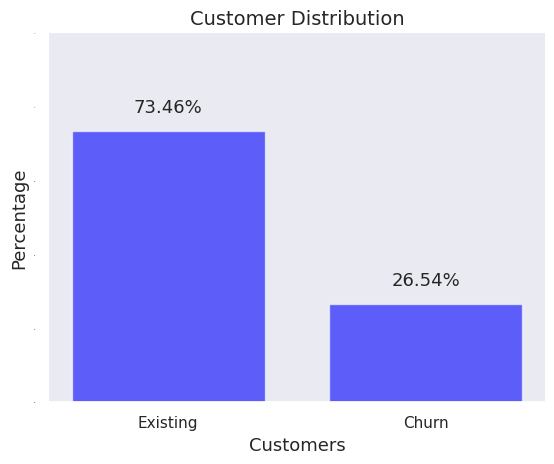

Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64


In [72]:
Churn_rate = df_cal['Churn'].value_counts(normalize=True)  # Ensure to normalize for percentages
Generate_bar_graph(
    Churn_rate.index.map({0: 'Existing', 1: "Churn"}),
    Churn_rate.values,
    'Customers',
    'Percentage',
    'Customer Distribution'
)

print(Churn_rate)


In [9]:
df_cal.describe(include='all')

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetServiceType,OnlineSecurity,...,StreamingTV,StreamingMovies,ContractType,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService,IsContracted
count,7043,7043,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043,7043.000000,...,7043.000000,7043.000000,7043,7043.000000,7043,7043.000000,7043,7043.000000,7043.000000,7043.000000
unique,7043,2,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,...,NaN,NaN,3,NaN,4,NaN,6531,NaN,NaN,NaN
top,7590-VHVEG,Male,NaN,NaN,NaN,NaN,NaN,NaN,Fiber optic,NaN,...,NaN,NaN,Month-to-month,NaN,Electronic check,NaN,,NaN,NaN,NaN
freq,1,3555,NaN,NaN,NaN,NaN,NaN,NaN,3096,NaN,...,NaN,NaN,3875,NaN,2365,NaN,11,NaN,NaN,NaN
mean,NaN,NaN,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,NaN,0.286668,...,0.384353,0.387903,NaN,0.592219,NaN,64.761692,NaN,0.265370,0.783331,0.449808
std,NaN,NaN,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,NaN,0.452237,...,0.486477,0.487307,NaN,0.491457,NaN,30.090047,NaN,0.441561,0.412004,0.497510
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,...,0.000000,0.000000,NaN,0.000000,NaN,18.250000,NaN,0.000000,0.000000,0.000000
25%,NaN,NaN,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,NaN,0.000000,...,0.000000,0.000000,NaN,0.000000,NaN,35.500000,NaN,0.000000,1.000000,0.000000
50%,NaN,NaN,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,NaN,0.000000,...,0.000000,0.000000,NaN,1.000000,NaN,70.350000,NaN,0.000000,1.000000,0.000000
75%,NaN,NaN,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,NaN,1.000000,...,1.000000,1.000000,NaN,1.000000,NaN,89.850000,NaN,1.000000,1.000000,1.000000


In [10]:
Churn_rate = df_cal['Churn'].value_counts() / df_cal.shape[0]
Churn_rate

,count
Churn,
0,0.73463
1,0.26537


In [13]:
churn_summary = df_cal.groupby('Churn')
print(churn_summary[['Tenure', 'MonthlyCharges']].mean())


          Tenure  MonthlyCharges
Churn                           
0      37.569965       61.265124
1      17.979133       74.441332


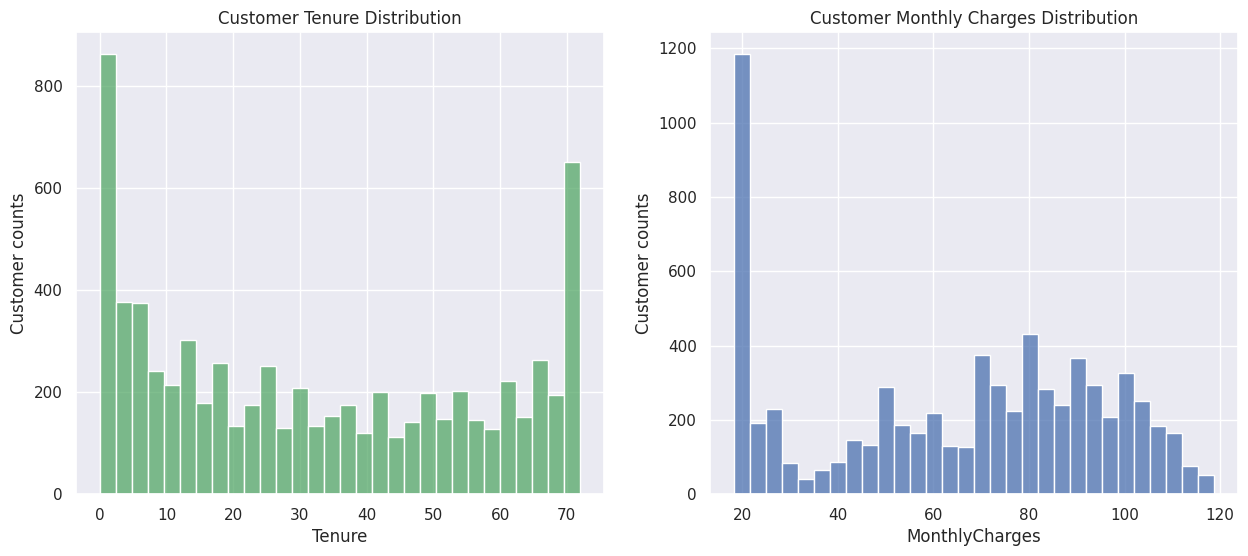

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

f, axes = plt.subplots(ncols=2, figsize=(15, 6))

# Customer Tenure Distribution
sns.histplot(df_cal.Tenure,
             color='g',  # Color of bars
             kde=False,  # Disable Gaussian Kernel density estimate
             ax=axes[0],  # Plot on given axis
             bins=30)  # Specify number of bins
axes[0].set_title("Customer Tenure Distribution")
axes[0].set_ylabel("Customer counts")  # Set ylabel of graph

# Customer Monthly Charges Distribution
sns.histplot(df_cal.MonthlyCharges,
             color='b',
             kde=False,
             ax=axes[1],
             bins=30)  # Specify number of bins
axes[1].set_title("Customer Monthly Charges Distribution")
axes[1].set_ylabel("Customer counts")

plt.show()


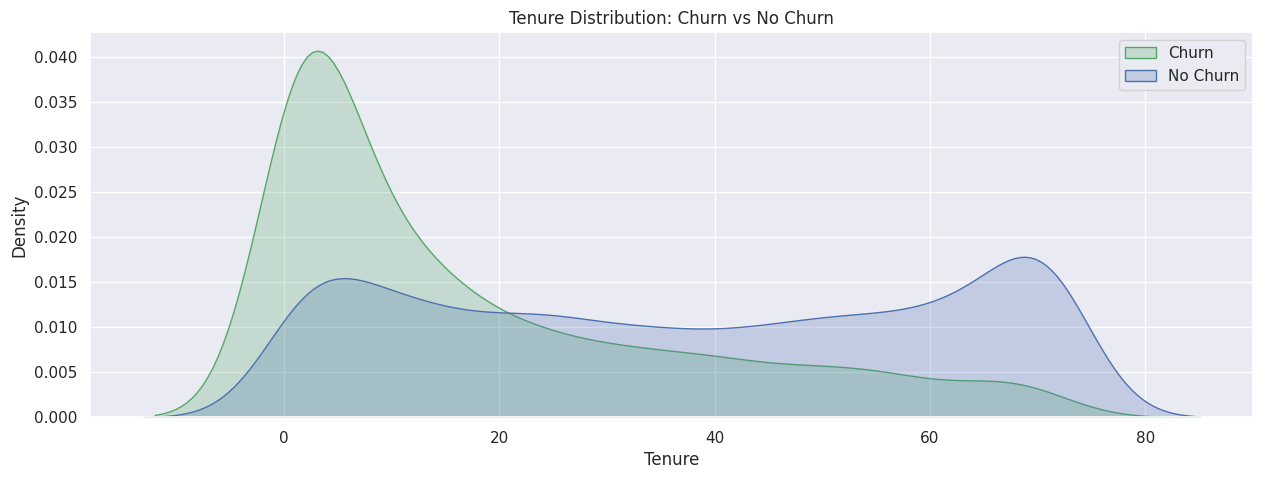

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(15, 5))

# KDE plot for customers who churned
ax = sns.kdeplot(df_cal.loc[(df_cal['Churn'] == 1), 'Tenure'],
                 color='g',
                 fill=True,  # Use fill instead of shade
                 label='Churn')

# KDE plot for customers who did not churn
ax = sns.kdeplot(df_cal.loc[(df_cal['Churn'] == 0), 'Tenure'],
                 color='b',
                 fill=True,  # Use fill instead of shade
                 label='No Churn')

plt.title("Tenure Distribution: Churn vs No Churn")
plt.legend()
plt.show()


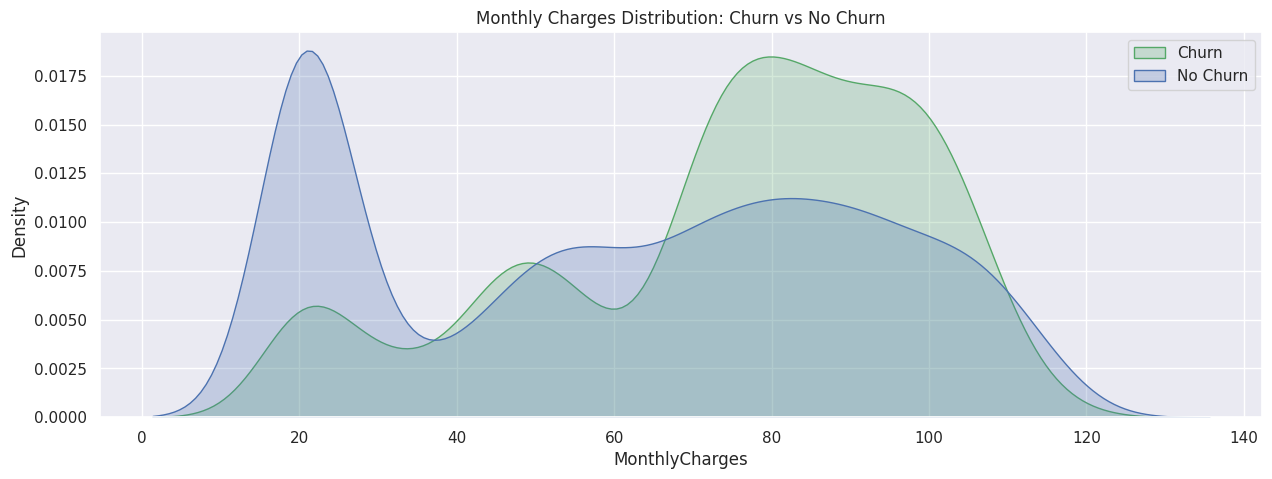

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(15, 5))

# KDE plot for customers who churned
ax = sns.kdeplot(df_cal.loc[(df_cal['Churn'] == 1), 'MonthlyCharges'],
                 color='g',
                 fill=True,  # Use fill instead of shade
                 label='Churn')

# KDE plot for customers who did not churn
ax = sns.kdeplot(df_cal.loc[(df_cal['Churn'] == 0), 'MonthlyCharges'],
                 color='b',
                 fill=True,  # Use fill instead of shade
                 label='No Churn')

plt.title("Monthly Charges Distribution: Churn vs No Churn")
plt.legend()
plt.show()


In [32]:
df_cal['Tenure_norm'] = (df_cal['Tenure'] - df_cal['Tenure'].min()) / (df_cal['Tenure'].max() - df_cal['Tenure'].min())
df_cal['MonthlyCharges_norm'] = (df_cal['MonthlyCharges'] - df_cal['MonthlyCharges'].min())/ (df_cal['MonthlyCharges'].max() - df_cal['MonthlyCharges'].min())
df_cal.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetServiceType,OnlineSecurity,...,ContractType,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService,IsContracted,Tenure_norm,MonthlyCharges_norm
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,...,Month-to-month,1,Electronic check,29.85,29.85,0,1,0,0.013889,0.115423
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,One year,0,Mailed check,56.95,1889.5,0,1,1,0.472222,0.385075
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,Month-to-month,1,Mailed check,53.85,108.15,1,1,0,0.027778,0.354229
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,...,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,1,0.625000,0.239303
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,Month-to-month,1,Electronic check,70.70,151.65,1,1,0,0.027778,0.521891


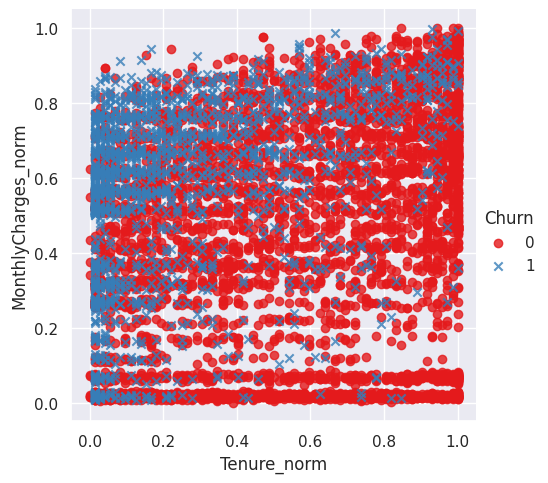

In [33]:
sns.lmplot(x='Tenure_norm',y='MonthlyCharges_norm',data=df_cal
               ,hue='Churn'
               ,fit_reg=False
               ,markers=["o", "x"]
               ,palette="Set1"
          )
plt.show()

Text(0.5, 1.0, 'Elbow curve')

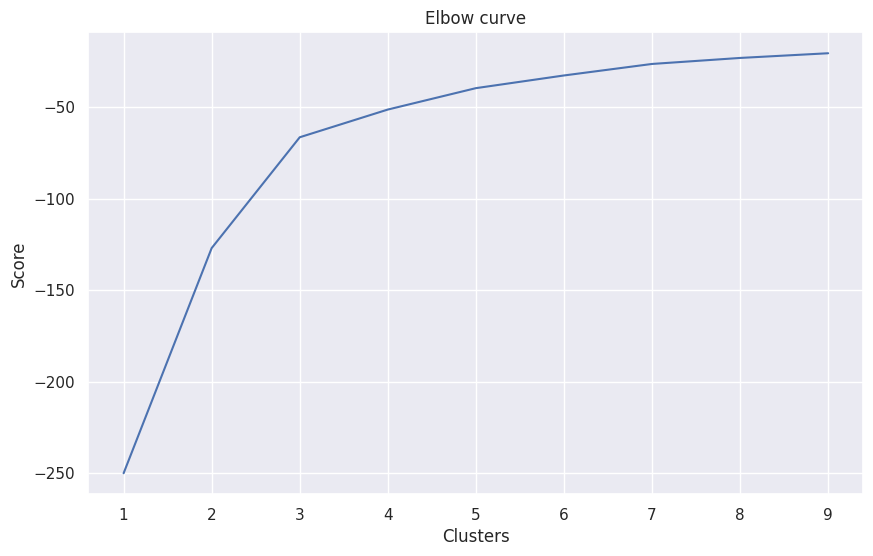

In [34]:
from sklearn.cluster import KMeans

df_kmeans_data = df_cal[df_cal.Churn==1][['Tenure_norm','MonthlyCharges_norm']]

k = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in k]

score = [kmeans[i].fit(df_kmeans_data).score(df_kmeans_data)  for i in range(len(kmeans))]

plt.figure(figsize=(10,6))
plt.plot(k,score)
plt.xlabel("Clusters")
plt.ylabel("Score")
plt.title("Elbow curve")

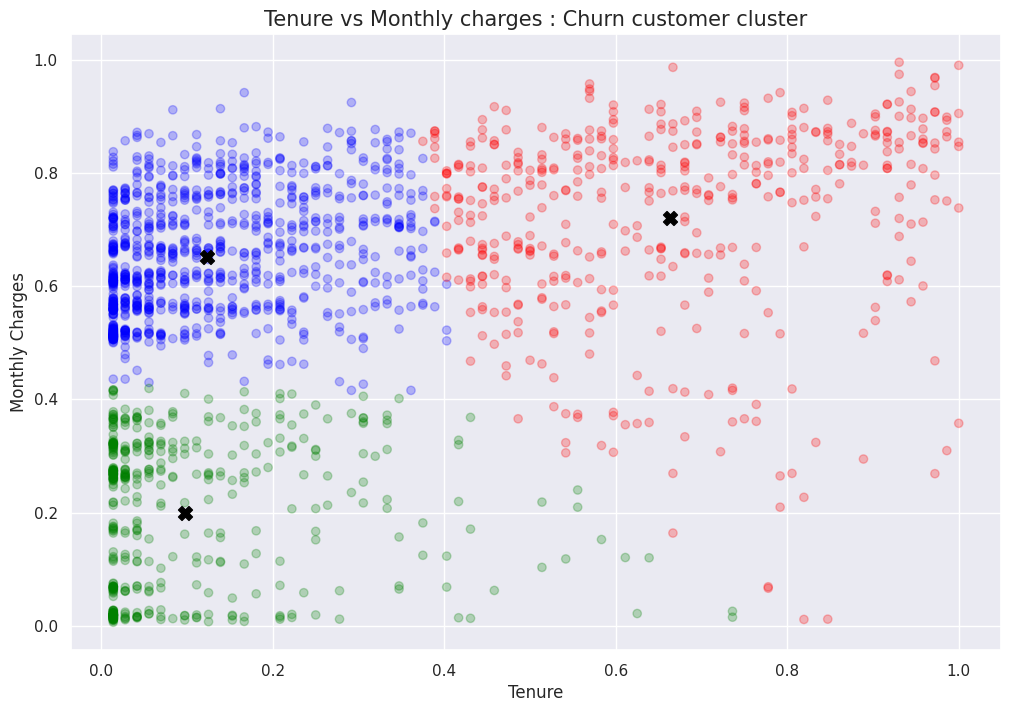

In [36]:
df_cal['Cluster'] = -1 # by default set Cluster to -1

kmeans = KMeans(n_clusters=3 # No of cluster in data
                , random_state = 2 # Selecting same training data
               )

kmeans.fit(df_cal[df_cal.Churn==1][['Tenure_norm','MonthlyCharges_norm']])
kmean_colors = ['green' if c == 0 else 'blue' if c == 1 else 'red' for c in kmeans.labels_]

df_cal.loc[(df_cal.Churn==1),'Cluster'] = kmeans.fit_predict(df_cal[df_cal.Churn==1][['Tenure_norm','MonthlyCharges_norm']])


fig = plt.figure(figsize=(12,8))
plt.scatter(x='Tenure_norm'
            , y='MonthlyCharges_norm'
            , data=df_cal[df_cal.Churn==1]
            , color=kmean_colors # color of data points
            , alpha=0.25 # transparancy of data points
           )

plt.xlabel("Tenure")
plt.ylabel("Monthly Charges")

plt.scatter(x=kmeans.cluster_centers_[:,0]
            , y=kmeans.cluster_centers_[:,1]
            , color='black'
            , marker='X' # Marker sign for data points
            , s=100 # marker size
           )
plt.title("Tenure vs Monthly charges : Churn customer cluster",fontsize=15)
plt.show()

In [37]:
df_cal[df_cal['Churn']==1].Cluster.value_counts()

,count
Cluster,
1,954
2,460
0,455


In [39]:
df_cluster_gp = df_cal[df_cal['Churn']==1].groupby('Cluster')
print(df_cluster_gp[['Tenure','MonthlyCharges']].mean())

            Tenure  MonthlyCharges
Cluster                           
0         7.013187       38.296154
1         8.868973       83.822851
2        47.719565       90.737174


In [40]:
group_gp = df_cluster_gp['Gender'].value_counts(normalize=True).to_frame()

#pd.concat([group_gp.index.name , group_gp.values])
group_gp.columns = ['Count']
group_gp = group_gp.reset_index()
group_gp_new = group_gp.copy()
group_gp_new

,Cluster,Gender,Count
0,0,Male,0.534066
1,0,Female,0.465934
2,1,Female,0.532495
3,1,Male,0.467505
4,2,Male,0.523913
5,2,Female,0.476087


In [42]:
df_cluster_gender_gp = df_cal[df_cal['Churn']==1].groupby(['Cluster','Gender'],as_index=False)
tenure_charges_gp =  df_cluster_gender_gp[['Tenure','MonthlyCharges']].mean()
tenure_charges_gp

,Cluster,Gender,Tenure,MonthlyCharges
0,0,Female,7.231132,37.701651
1,0,Male,6.823045,38.814815
2,1,Female,8.572835,83.515748
3,1,Male,9.206278,84.172646
4,2,Female,46.022831,90.547032
5,2,Male,49.261411,90.909959


In [43]:
gender_eda = pd.merge(group_gp_new
                      , tenure_charges_gp
                      , on=['Cluster','Gender']
                      , how='inner')

print("Gender summary\n" , gender_eda)


demographic_gp = gender_eda.drop_duplicates(subset=['Cluster'],keep='first').reset_index()
demographic_gp.drop(['index'],axis=1,inplace=True)
demographic_gp.columns = ['Cluster','Label','Count','Tenure','MonthlyCharges']
demographic_gp['Marker'] = ['X','X','X']
demographic_gp['Marker_index'] = [[1,-1],[1,-1],[1,-1]]

print("Gender & Cluster \n ",demographic_gp)

Gender summary
    Cluster  Gender     Count     Tenure  MonthlyCharges
0        0    Male  0.534066   6.823045       38.814815
1        0  Female  0.465934   7.231132       37.701651
2        1  Female  0.532495   8.572835       83.515748
3        1    Male  0.467505   9.206278       84.172646
4        2    Male  0.523913  49.261411       90.909959
5        2  Female  0.476087  46.022831       90.547032
Gender & Cluster 
     Cluster   Label     Count     Tenure  MonthlyCharges Marker Marker_index
0        0    Male  0.534066   6.823045       38.814815      X      [1, -1]
1        1  Female  0.532495   8.572835       83.515748      X      [1, -1]
2        2    Male  0.523913  49.261411       90.909959      X      [1, -1]


In [46]:
import pandas as pd

# Assuming demographic_gp is already defined
df_cluster_seniorcitizen_cnt = df_cluster_gp['SeniorCitizen'].value_counts(normalize=True)

df_cluster_seniorcitizen_gp = df_cal[df_cal['Churn'] == 1].groupby(['Cluster', 'SeniorCitizen'], as_index=False)
df_cluster_seniorcitizen_gp = df_cluster_seniorcitizen_gp[['Tenure', 'MonthlyCharges']].mean()
df_cluster_seniorcitizen_gp = df_cluster_seniorcitizen_gp[(df_cluster_seniorcitizen_gp['Cluster'] == 1)
                                                            & (df_cluster_seniorcitizen_gp['SeniorCitizen'] == 1)]

# Create a new DataFrame with the data to be added
new_data = pd.DataFrame({
    "Cluster": [1],
    "Label": ['SeniorCitizen'],
    "Count": [df_cluster_seniorcitizen_cnt[1]],  # Ensure this index exists
    "Tenure": df_cluster_seniorcitizen_gp['Tenure'].values,
    "MonthlyCharges": df_cluster_seniorcitizen_gp['MonthlyCharges'].values,
    "Marker": ['o'],
    "Marker_index": [[-1, 3]]
})

# Concatenate the existing DataFrame with the new one
demographic_gp = pd.concat([demographic_gp, new_data], ignore_index=True)

print(demographic_gp)


   Cluster          Label                                              Count  \
0        0           Male                                           0.534066   
1        1         Female                                           0.532495   
2        2           Male                                           0.523913   
3        1  SeniorCitizen  SeniorCitizen
0    0.72327
1    0.27673
Name: ...   

      Tenure  MonthlyCharges Marker Marker_index  
0   6.823045       38.814815      X      [1, -1]  
1   8.572835       83.515748      X      [1, -1]  
2  49.261411       90.909959      X      [1, -1]  
3   9.844697       84.611553      o      [-1, 3]  


In [47]:
df_cluster_partner_cnt = df_cluster_gp['Partner'].value_counts(normalize=True)
print(df_cluster_partner_cnt)

Cluster  Partner
0        0          0.756044
         1          0.243956
1        0          0.699161
         1          0.300839
2        1          0.589130
         0          0.410870
Name: proportion, dtype: float64


In [48]:
df_cluster_dependent_cnt = df_cluster_gp['Dependents'].value_counts(normalize=True)
print(df_cluster_dependent_cnt)

Cluster  Dependents
0        0             0.802198
         1             0.197802
1        0             0.857442
         1             0.142558
2        0             0.782609
         1             0.217391
Name: proportion, dtype: float64


In [49]:
demographic_gp['Marker']

,Marker
0,X
1,X
2,X
3,o


Text(0.5, 1.0, 'Tenure vs Monthly charges demographic distribution')

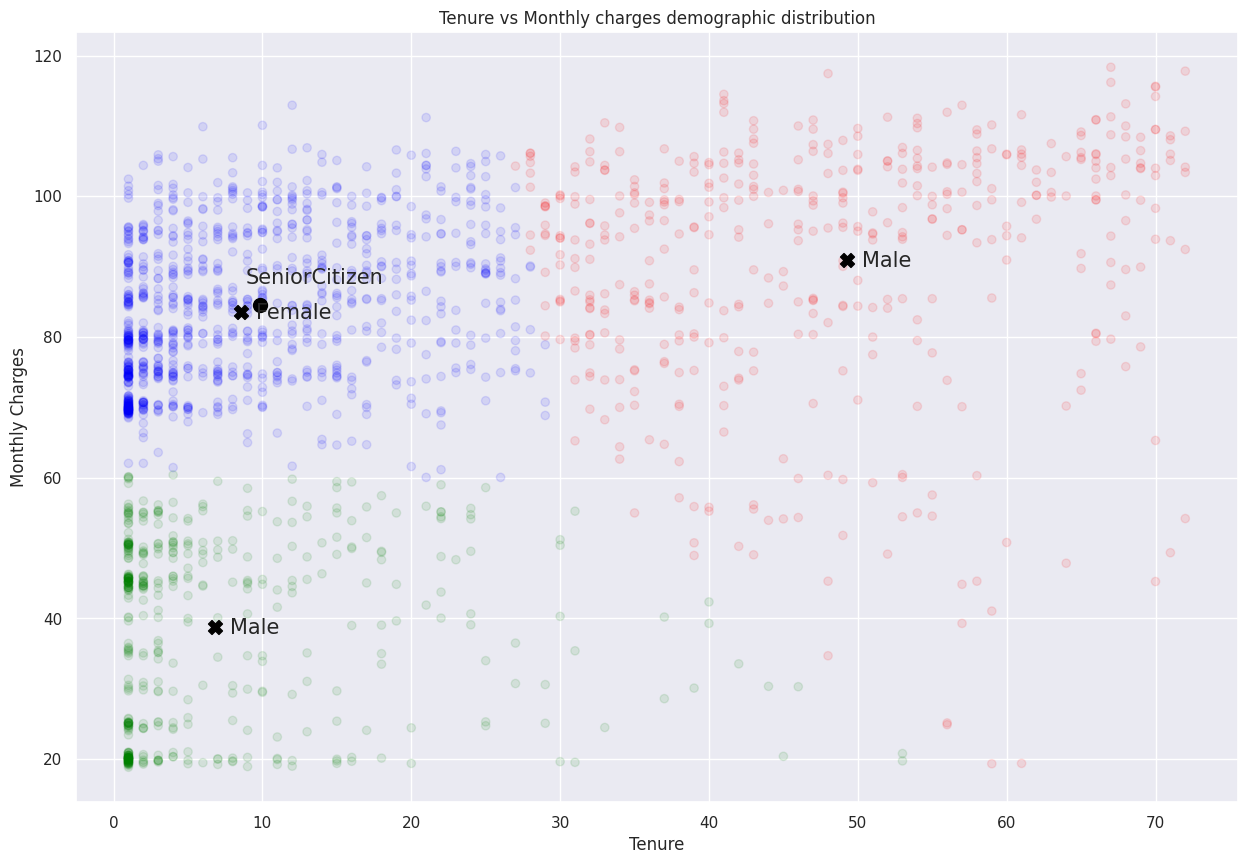

In [50]:
fig, ax = plt.subplots(figsize=(15,10))

ax.scatter(x='Tenure'
            , y='MonthlyCharges'
            , data=df_cal[df_cal.Churn==1]
            , color=kmean_colors # color of data points
            , alpha=0.10 # transparancy of data points
           )

for i,kind in enumerate(demographic_gp['Marker']):
    ax.scatter(x=demographic_gp['Tenure'][i]
            , y=demographic_gp['MonthlyCharges'][i]
            , color='black'
            , marker=kind # Marker sign for data points
            , s=100 # marker size
           )



for i,txt in enumerate(demographic_gp['Label']):
    ax.text(demographic_gp['Tenure'][i] + demographic_gp['Marker_index'][i][0]
            ,demographic_gp['MonthlyCharges'][i] + demographic_gp['Marker_index'][i][1]
            ,txt
            ,fontsize = 15
            )

plt.xlabel("Tenure")
plt.ylabel("Monthly Charges")
plt.title("Tenure vs Monthly charges demographic distribution")

In [51]:
'''
Usage related information


Phone service -

PhoneService             int64
MultipleLines            int64

Internet service -
InternetServiceType     object
OnlineSecurity           int64
OnlineBackup             int64
DeviceProtection         int64
TechSupport              int64
StreamingTV              int64
StreamingMovies          int64

Contract type - ContractType
'''


df_usage = df_cal[df_cal['Churn']==1].groupby('Churn')

In [52]:

print(df_cal['PhoneService'].value_counts(normalize=True))

print(df_cal.groupby('Churn')['PhoneService'].value_counts(normalize=True))

PhoneService
1    0.903166
0    0.096834
Name: proportion, dtype: float64
Churn  PhoneService
0      1               0.901044
       0               0.098956
1      1               0.909042
       0               0.090958
Name: proportion, dtype: float64


In [53]:
print(df_cal[df_cal['PhoneService']==1]['MultipleLines'].value_counts(normalize=True))

print(df_cal[df_cal['PhoneService']==1].groupby('Churn')['MultipleLines'].value_counts(normalize=True))

MultipleLines
0    0.532935
1    0.467065
Name: proportion, dtype: float64
Churn  MultipleLines
0      0                0.545045
       1                0.454955
1      1                0.500294
       0                0.499706
Name: proportion, dtype: float64


In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset
df_raw = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Data preprocessing
df_cal = df_raw.copy()
df_cal.rename(columns={'gender':'Gender', 'customerID':'CustomerID', 'Contract':'ContractType',
                       'InternetService':'InternetServiceType', 'tenure':'Tenure'}, inplace=True)

# Map categorical variables to numerical
df_cal['Partner'] = df_cal.Partner.map({'Yes':1,'No':0})
df_cal['Dependents'] = df_cal.Dependents.map({'Yes':1,'No':0})
df_cal['PhoneService'] = df_cal.PhoneService.map({'Yes':1,'No':0})
df_cal['MultipleLines'] = df_cal.MultipleLines.map({'Yes':1,'No':0,'No phone service':0})
df_cal['InternetService'] = df_cal.InternetServiceType.map({'DSL':1,'Fiber optic':1,'No':0})
df_cal['OnlineSecurity'] = df_cal.OnlineSecurity.map({'Yes':1,'No':0,'No internet service':0})
df_cal['OnlineBackup'] = df_cal.OnlineBackup.map({'Yes':1,'No':0,'No internet service':0})
df_cal['DeviceProtection'] = df_cal.DeviceProtection.map({'Yes':1,'No':0,'No internet service':0})
df_cal['TechSupport'] = df_cal.TechSupport.map({'Yes':1,'No':0,'No internet service':0})
df_cal['StreamingTV'] = df_cal.StreamingTV.map({'Yes':1,'No':0,'No internet service':0})
df_cal['StreamingMovies'] = df_cal.StreamingMovies.map({'Yes':1,'No':0,'No internet service':0})
df_cal['IsContracted'] = df_cal.ContractType.map({'One year':1,'Two year':1,'Month-to-month':0})
df_cal['PaperlessBilling'] = df_cal.PaperlessBilling.map({'Yes':1,'No':0})
df_cal['Churn'] = df_cal.Churn.map({'Yes':1,'No':0})

# Feature selection
features = ['Tenure', 'MonthlyCharges', 'Partner', 'Dependents', 'PhoneService',
            'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
            'IsContracted', 'PaperlessBilling']

# Target variable
target = 'Churn'

# Split the data into training and testing sets
X = df_cal[features]
y = df_cal[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build and evaluate Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

print("Decision Tree Classifier:")
print(confusion_matrix(y_test, dt_predictions))
print(classification_report(y_test, dt_predictions))
print(f"Accuracy: {accuracy_score(y_test, dt_predictions)}\n")

# Build and evaluate Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

print("Random Forest Classifier:")
print(confusion_matrix(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))
print(f"Accuracy: {accuracy_score(y_test, rf_predictions)}\n")

# Build and evaluate Logistic Regression Classifier
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

print("Logistic Regression Classifier:")
print(confusion_matrix(y_test, lr_predictions))
print(classification_report(y_test, lr_predictions))
print(f"Accuracy: {accuracy_score(y_test, lr_predictions)}")


Decision Tree Classifier:
[[832 204]
 [193 180]]
              precision    recall  f1-score   support

           0       0.81      0.80      0.81      1036
           1       0.47      0.48      0.48       373

    accuracy                           0.72      1409
   macro avg       0.64      0.64      0.64      1409
weighted avg       0.72      0.72      0.72      1409

Accuracy: 0.7182398864442867

Random Forest Classifier:
[[931 105]
 [196 177]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1036
           1       0.63      0.47      0.54       373

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.77      0.79      0.78      1409

Accuracy: 0.7863733144073811

Logistic Regression Classifier:
[[935 101]
 [159 214]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1036
           1       0.68 

In [55]:
import pandas as pd
import numpy as np

# Assuming you have a trained Decision Tree model named 'dt_model' and df_cal DataFrame from your previous work

# Create new customer data with consistent length for all features
new_customer_data = pd.DataFrame({
    'Tenure': [12, 24],  # Example tenure values for 2 customers
    'MonthlyCharges': [70.0, 50.0],  # Example monthly charges for 2 customers
    'Partner': [1, 0],  # Partner status for 2 customers
    'Dependents': [0, 1],  # Dependents status for 2 customers
    'PhoneService': [1, 0],  # Phone service for 2 customers
    'MultipleLines': [1, 0],  # Multiple lines for 2 customers
    'InternetServiceType': ['Fiber optic', 'DSL'],  # Internet service type for 2 customers
    'OnlineSecurity': [1, 0],  # Online security for 2 customers
    'OnlineBackup': [1, 0],  # Online backup for 2 customers
    'DeviceProtection': [1, 0],  # Device protection for 2 customers
    'TechSupport': [1, 0],  # Tech support for 2 customers
    'StreamingTV': [1, 0],  # Streaming TV for 2 customers
    'StreamingMovies': [1, 0],  # Streaming movies for 2 customers
    'ContractType': ['Month-to-month', 'One year'],  # Contract type for 2 customers
    'PaperlessBilling': [1, 0]  # Paperless billing for 2 customers
})

# Convert categorical variables to the format used during training
new_customer_data['InternetService'] = new_customer_data['InternetServiceType'].map({'DSL': 1, 'Fiber optic': 1, 'No': 0})
new_customer_data['IsContracted'] = new_customer_data['ContractType'].map({'One year': 1, 'Two year': 1, 'Month-to-month': 0})

# Drop the original categorical columns as they are no longer needed
new_customer_data.drop(columns=['InternetServiceType', 'ContractType'], inplace=True)

# Normalize the new data
new_customer_data['Tenure_norm'] = (new_customer_data['Tenure'] - df_cal['Tenure'].min()) / (df_cal['Tenure'].max() - df_cal['Tenure'].min())
new_customer_data['MonthlyCharges_norm'] = (new_customer_data['MonthlyCharges'] - df_cal['MonthlyCharges'].min()) / (df_cal['MonthlyCharges'].max() - df_cal['MonthlyCharges'].min())

# Prepare the features for prediction
features = ['Tenure_norm', 'MonthlyCharges_norm', 'Partner', 'Dependents', 'PhoneService',
            'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
            'IsContracted', 'PaperlessBilling']

new_X = new_customer_data[features]

# Make predictions using the trained Decision Tree model
new_predictions = dt_model.predict(new_X)

# Add predictions to the new customer data DataFrame
new_customer_data['Predicted Churn'] = new_predictions

# Display the new customer data with predictions
print(new_customer_data[['Tenure', 'MonthlyCharges', 'Predicted Churn']])


   Tenure  MonthlyCharges  Predicted Churn
0      12            70.0                1
1      24            50.0                1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
